# Airbnb listing analysis project.
## Project Overview
Airbnb has become one of the leading platforms in the short term rental markets,connecting millions of hosts and guests from different  parts of the country and also internationally. It has also proved to be a worthy competitor to hotel business chain since individuals now prefer Airbnbs due to their customer customaization. With the larger amounts of data generated from listings, pricing, reviews and availabilty it provides an opportnity to analyze patterns and gain helpful insights to both the hosts and the customer.

This project strives to explore the key factors influencing pricing, availability, customer preferences and neighborhood trends.Additionally, the findings can provide the Airbnb business with deeper understanding of market dynamics to enhance overall performance.

## Business Problem
Airbnb operates in a highly competitive short term rental market where pricing, location and customer experience strongly influence booking success. Many hosts struggle to set competitive pricing or understand the features that attract guests leading to losing revenue and low occupancy rates. Additionally, travellers also face challenges high pricing variability, inconsistent availabilty and differences in hosts reliability.Addressing these issues is crucial for improving host profitability, guest satisfaction and overall platform efficiency.

## Objectives.
1. To identify the most popular neighborhoods and property types.
2. To analyze the relationship between prices and key factors.
3. To examine seasonal and booking trends.

## Data understanding
The data used in this project is a csv file named New York City Open Data from  kaggle website https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data.
It contains 19 columns and 48879 rows after data cleaning and feature engineering which include variables such as:
+ Id
+ host name
+ neighborhood group
+ pricing
+ number of reviews
+ availability 

## Data Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_AB = pd.read_csv('./AB_NYC_2019.csv')
df_AB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data cleaning 
In this section I was able to check for missing entries in important columns such as last review and host name.Procceeded to fill in the null values in various columns using appropriate placeholders, I decided to fill the missing values instead of dropping according the percentage of missing values.Dropping a few rows that had missing listing name values since we cannot fill out non existent listings .Additionally, I checked for duplicated values in the dataframe.

In [5]:
df_AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#from the data set above we are able to identify that various columns have null values ie name,host_name,last_review and reviews_per_month
df_AB.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# we proceed to drop the missing values in this column since the percentage of missing values is less than 30%
percentage_name = 16/48895 *100
percentage_name

0.03272318232948154

In [8]:
df_AB.dropna(subset=['name'], inplace=True)


In [9]:
df_AB.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#now the name column is already dealt with 
df_AB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48879 non-null  object 
 5   neighbourhood                   48879 non-null  object 
 6   latitude                        48879 non-null  float64
 7   longitude                       48879 non-null  float64
 8   room_type                       48879 non-null  object 
 9   price                           48879 non-null  int64  
 10  minimum_nights                  48879 non-null  int64  
 11  number_of_reviews               48879 non-null  int64  
 12  last_review                     

In [11]:
percentage_host_name= 21/48895 * 100
percentage_host_name

0.04294917680744453

In [12]:
#to fill the few host names that are missing we'll assign them to a place holder value
df_AB['host_name'] = df_AB['host_name'].fillna('Unknown')

In [13]:
df_AB.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
#percentage of the missing values is 20%
percentage_last_review = 10042/48895 *100
percentage_last_review

20.537887309540853

In [15]:
df_AB['last_review'].unique()

array(['2018-10-19', '2019-05-21', nan, ..., '2017-12-23', '2018-01-29',
       '2018-03-29'], dtype=object)

In [16]:
#the no reviews is used as a place holder since the last review column indicates the most recent guest review in that Airbnb listing
#it can be used to check the activity and popularity of a listing 
df_AB['last_review'] = df_AB['last_review'].fillna('No reviews')
df_AB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No reviews,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
df_AB.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
#percentage is below 20% so we fill the column since it will come handy in analysis
percentage_reviews_per_month = 10042/48895 *100
percentage_reviews_per_month

20.537887309540853

In [19]:
df_AB['reviews_per_month'] = df_AB['reviews_per_month'].fillna(0)
df_AB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No reviews,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
df_AB.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Checked for duplicates values in our data set 

In [21]:
df_AB.duplicated().sum()

0

Our data has no missing values now we proceed to adding addition columns that will give further insights 

In [22]:
#we have 16 cloumns and 48879 rows in our dataset
df_AB.shape

(48879, 16)

In [23]:
df_AB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   host_name                       48879 non-null  object 
 4   neighbourhood_group             48879 non-null  object 
 5   neighbourhood                   48879 non-null  object 
 6   latitude                        48879 non-null  float64
 7   longitude                       48879 non-null  float64
 8   room_type                       48879 non-null  object 
 9   price                           48879 non-null  int64  
 10  minimum_nights                  48879 non-null  int64  
 11  number_of_reviews               48879 non-null  int64  
 12  last_review                     

## Feature Engineering.
This is the process of creating, transforming or  selecting variables that make your dataframe more accurate and insightful.I added various columns such as last review , host name frequency and availability category to help the analysis and prediction.


In [24]:
str(df_AB['last_review'])

'0        2018-10-19\n1        2019-05-21\n2        No reviews\n3        2019-07-05\n4        2018-11-19\n            ...    \n48890    No reviews\n48891    No reviews\n48892    No reviews\n48893    No reviews\n48894    No reviews\nName: last_review, Length: 48879, dtype: object'

In [25]:
#added a new column called days since last review to check the popularity of the listings
df_AB['last_review'] = pd.to_datetime(df_AB['last_review'], errors='coerce')
df_AB['days_since_last_review'] = (pd.Timestamp.today() - df_AB['last_review']).dt.days


In [26]:
df_AB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2537.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2323.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2278.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2506.0


In [27]:
df_AB['host_name'].unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [28]:
df_AB['host_name'].value_counts()

Michael          417
David            403
Sonder (NYC)     327
John             294
Alex             279
                ... 
Aidas              1
Francoise X        1
Damiso             1
Anya & Marco       1
Linda & Chris      1
Name: host_name, Length: 11451, dtype: int64

In [29]:
#adding a column to show the how many listings each host has 
#using the map function
df_AB['host_name_frequency'] = df_AB['host_name'].map(df_AB['host_name'].value_counts())


In [30]:
df_AB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,host_name_frequency
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2537.0,294
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2323.0,154
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN,13
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2278.0,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2506.0,182


Creating a new column to interpret the availability of the listings i.e the categories.

In [31]:
#we start by using a function to define the different categories
def categorized_availability(availability_365):
    if availability_365 == 0:
        return 'Not available'
    elif availability_365 <= 90:
        return 'up to 3 months'
    elif availability_365 <= 180:
        return 'up to 6 months'
    elif availability_365 < 365:
        return 'up to 1 year'
    else:
        return 'Full year'
    
df_AB['availability_category'] = df_AB['availability_365'].apply(categorized_availability)

In [32]:
df_AB.head(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,host_name_frequency,availability_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2537.0,294,Full year
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2323.0,154,up to 1 year
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN,13,Full year
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2278.0,1,up to 1 year
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2506.0,182,Not available
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2291.0,182,up to 6 months
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,2916.0,1,Not available
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,2289.0,1,up to 1 year
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,2992.0,2,Not available
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,2304.0,135,up to 1 year


In [33]:
df_AB.shape

(48879, 19)

In [34]:
df_AB['Month'] = df_AB['last_review'].dt.month

In [35]:
df_AB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,host_name_frequency,availability_category,Month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2537.0,294,Full year,10.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2323.0,154,up to 1 year,5.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN,13,Full year,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2278.0,1,up to 1 year,7.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2506.0,182,Not available,11.0


## Analysis.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#this is the number of listings in the dataset 
len(df_AB)

48879

In [ ]:
#the ID column shows that the listings have a unique number for identification
df_AB['id'].value_counts().sum()

48879

### Objective 1: To identify the most popular neighborhoods and room types.
Answer:The most popular neighborhoods are Williamsburg, Bedford-Stuyvesant,
Harlem,Bushwick, Upper West Side, Hell's Kitchen, East Village, Upper East Side,Crown Heights and Midtown  
The most dominating room type is Entire home/apt             

In [62]:
#Finding the top 10 neighborhoods by listing count 
top_10_neighborhoods = df_AB['neighbourhood'].value_counts().head(10)
top_10_neighborhoods

Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2657
Bushwick              2463
Upper West Side       1970
Hell's Kitchen        1957
East Village          1852
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

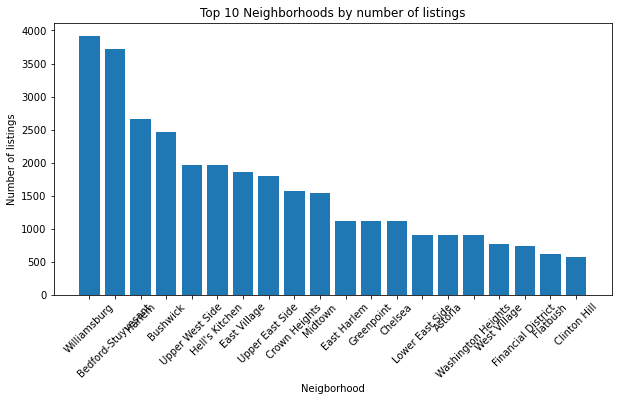

In [61]:
plt.figure(figsize=(10,5))
plt.bar(top_10_neighborhoods.index,top_10_neighborhoods.values)
plt.title('Top 10 Neighborhoods by number of listings')
plt.xlabel('Neigborhood')
plt.ylabel('Number of listings')
plt.xticks(rotation=45)
plt.show()

Here we are analyzing the 10 most popular neighborhoods across the listings of our Airbnb in New York City. In the bar graph above we are able to see that Williamsburg is the most popular neighborhood with 3918 listings among the various neighborhoods.The demand of listings is concentrated in Williamsburg and Bedford-Stuyvesant and goes on to decrease having Clinton Hill with the lowest number of listings.

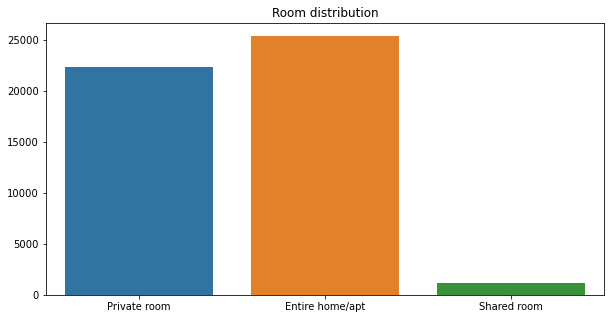

In [ ]:
#roomtype distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df_AB, x='room_type')
plt.title('Room type vs No of listings')
plt.xlabel('Room type')
plt.ylabel('No of listings')
plt.show()

This is a countplot showing the room type distribution across the various listings, it is evident that the dominating room type in the listings is the Entire home/ apt room type.

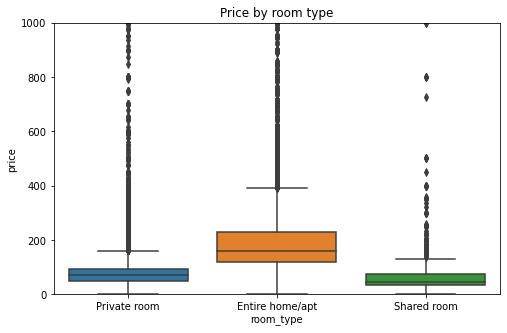

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_AB,x='room_type', y='price')
plt.ylim(0,1000)
plt.title('Price by room type')
plt.show()

In [65]:
df_AB['price'].median()

106.0

In the boxplot above we are able to see that the private room has a median ranging from 50-100, Entire home/apt median is  quite higher ranging from 150-200 and the Shared room has the lowest median 30-50. This shows that on average the Entire home/apt costs the most compared to the shared and private rooms.Entire home has the widest spread and greatest variability in terms of pricing, private room has variability but lesser extreeme pricing while shared rooms have the smallest spread. All three categories have a huge number of outliers but Entire homes goes way beyond the scale.

### Objective 2: To analyze the relationship between price and key factors.
Answer:From the scatter plot, we observe that listings with lower prices tend to attract more reviews, with some affordable listings receiving up to 60 reviews. Conversely, higher-priced listings generally have fewer reviews, suggesting that affordability is an important driver of customer engagement.

The heatmap analysis further supports this by showing only a very weak negative correlation (-0.051) between price and reviews per month. Similarly, the correlation between price and availability (+0.082) is weak and insignificant. This indicates that price has little direct influence on either availability or review frequency in the dataset.

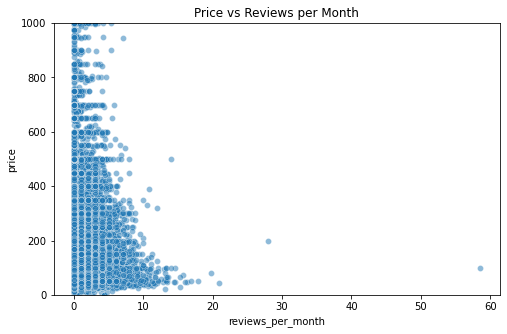

In [68]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_AB, x="reviews_per_month", y="price", alpha=0.5)
plt.ylim(0, 1000)
plt.title("Price vs Reviews per Month")
plt.show()


In the scatter plot, we observe that listings with lower prices tend to attract more reviews, with some affordable listings receiving up to 60 reviews. On the other hand, as prices increase, the number of reviews generally decreases. This suggests that affordability is a key factor influencing customer engagement and review frequency.

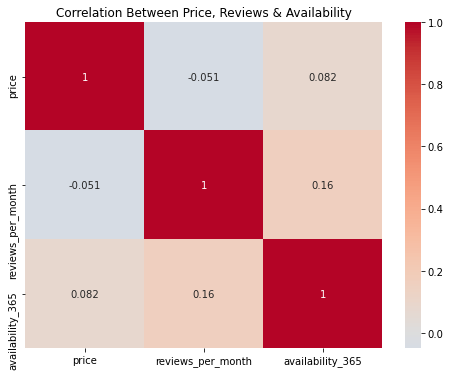

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(df_AB[["price","reviews_per_month","availability_365"]].corr(),
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Price, Reviews & Availability")
plt.show()

Price vs Reviews per month very weak negative correlation (-0.051) it suggests that higher prices are very slightly associated with fewer reviews per month.Price doesn't strongly determine how often a listing gets reviewed.
Price vs Availability_365 very weak positive correlation (+0.082) it means that higher priced listings are slightly more likely to be available throughout the year.
Reviews per month vs Availability_365 weak positive correlation (+0.16) indicates that listings with higher availability tend to receive slightly more reviews per month.

In [74]:
#Average price by month
monthly_price = df_AB.groupby('Month')['price'].mean()
monthly_price

Month
1.0     150.414440
2.0     155.716883
3.0     136.836957
4.0     139.504979
5.0     137.909594
6.0     140.765308
7.0     142.290382
8.0     132.195796
9.0     149.494463
10.0    142.065330
11.0    138.532815
12.0    160.796610
Name: price, dtype: float64

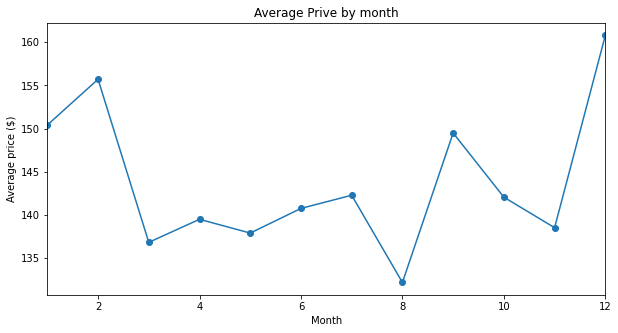

In [78]:
plt.figure(figsize=(10,5))
monthly_price.plot(kind='line', marker='o')
plt.title('Average Prive by month')
plt.xlabel('Month')
plt.ylabel('Average price ($)')
plt.xlim(1,12)
plt.show()

In [ ]:
#Availabilty trend by month
monthly_avail = df_AB.groupby('Month')['availability_365'].mean()